In [3]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import quad
from iminuit import Minuit

In [ ]:
class linear:
    def __init__(self, intercept, slope, lolimit, hilimit):
        self.intercept = intercept
        self.slope = slope
        
        self.lolimit = lolimit
        self.hilimit = hilimit

        self.mass = []
        self.maxval = self.evaluate(self.lolimit if self.slope < 0. else self.hilimit)
       
    def evaluate(self, x):
        return self.intercept + self.slope*x

In [9]:
def min_chi2(intercept, slope):
    # Defined a Minuit specific funtion for chi^2 minimisation
    # for null Hypothesis only, therefore set with flat + guassian model
    
    model = linear(intercept, slope, np.min(y), np.max(y))

    N_exp = np.array(model.evaluate(x))
    #N_exp[N_exp <= 0.] = 1e-3

    #print(y, N_exp, np.log(y/N_exp))
    return np.sum((N_exp - y + (y*np.log(y/N_exp))))

C:\Users\blysh\AppData\Local\Temp\ipykernel_30592\2735857800.py:11: RuntimeWarning: divide by zero encountered in log
  return (N_exp - y + (y*np.log(y/N_exp)))
C:\Users\blysh\AppData\Local\Temp\ipykernel_30592\2735857800.py:11: RuntimeWarning: invalid value encountered in multiply
  return (N_exp - y + (y*np.log(y/N_exp)))


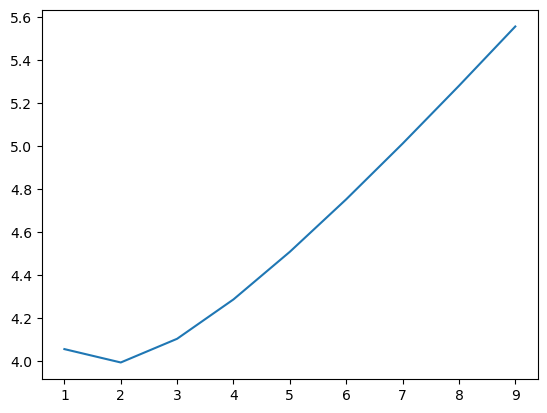

In [15]:
nLL = min_chi2(5, 2)
plt.plot(nLL)

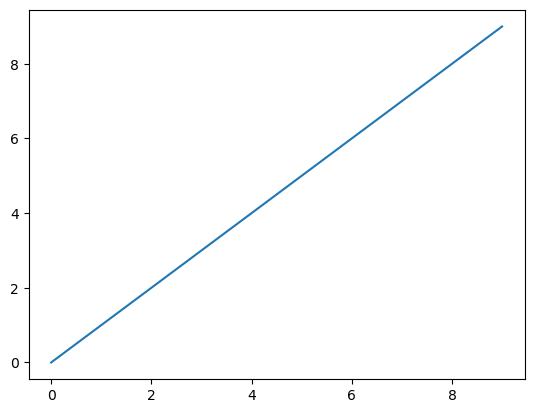

C:\Users\blysh\AppData\Local\Temp\ipykernel_30592\2735857800.py:11: RuntimeWarning: divide by zero encountered in log
  return (N_exp - y + (y*np.log(y/N_exp)))
C:\Users\blysh\AppData\Local\Temp\ipykernel_30592\2735857800.py:11: RuntimeWarning: invalid value encountered in multiply
  return (N_exp - y + (y*np.log(y/N_exp)))


RuntimeError: Unable to cast Python instance to C++ type (compile in debug mode for details)

In [14]:
x = np.arange(0, 10, 1)
y = np.arange(0, 10, 1)

plt.plot(x, y)
plt.show()

startvals_H1 = {
        'intercept': 5.,
        'slope': 2,
    }


Min = Minuit(min_chi2, **startvals_H1)
Min.migrad()
Min.hesse()